In [1]:
import os
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'weather data/weather_combine.xlsx'

In [3]:
df = pd.read_excel(path)

df.head()

,Day,Max_Temperature,Avg_Temperature,Min_Temperature,Max_Dew Point,Avg_Dew Point,Min_Dew Point,Max_Humidity,Avg_Humidity,Min_Humidity,Max_Wind Speed,Avg_Wind Speed,Min_Wind Speed,Max_Pressure,Avg_Pressure,Min_Pressure,Precipitation,Month,Year
0,1,73,70.5,66,70,67.7,66,100,91.6,88,6,1.9,0,29.6,29.6,29.5,0.0,Jan,2018
1,2,68,65.5,64,68,65.5,64,100,100.0,100,7,1.3,0,29.6,29.5,29.5,0.0,Jan,2018
2,3,68,67.3,64,68,66.5,64,100,97.8,88,3,1.0,0,29.6,29.5,29.5,0.0,Jan,2018
3,4,77,68.0,59,68,63.2,55,100,85.5,65,8,3.3,0,29.6,29.6,29.5,0.0,Jan,2018
4,5,77,66.7,55,66,62.7,54,100,87.9,69,6,2.7,0,29.6,29.5,29.4,0.0,Jan,2018


In [4]:
temperature = ['Max_Temperature', 'Avg_Temperature', 'Min_Temperature','Max_Dew Point', 'Avg_Dew Point', 'Min_Dew Point']

for temp_feature in temperature:
    df[temp_feature] = (df[temp_feature]-32) * 0.5556
        
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Day,1821.0,15.733663,8.812573,1.00000,8.00000,16.00000,23.00000,31.00000
Max_Temperature,1821.0,34.164061,3.712283,20.00160,32.22480,33.89160,37.22520,42.78120
Avg_Temperature,1821.0,28.578069,4.396512,-12.72324,25.50204,29.50236,31.83588,40.50324
Min_Temperature,1821.0,21.423094,6.539531,-17.77920,17.22360,23.89080,26.11320,38.89200
Max_Dew Point,1821.0,22.242001,4.311988,6.11160,17.77920,23.89080,26.11320,28.89120
Avg_Dew Point,1821.0,20.105672,4.928931,-13.27884,15.72348,22.33512,24.22416,27.33552
Min_Dew Point,1821.0,17.608950,6.390435,-17.77920,12.22320,20.00160,22.77960,26.11320
Max_Humidity,1821.0,86.468424,9.709105,23.00000,83.00000,88.00000,94.00000,100.00000
Avg_Humidity,1821.0,63.583855,13.128754,8.20000,55.40000,64.50000,72.30000,100.00000
Min_Humidity,1821.0,44.757276,15.516576,0.00000,33.00000,45.00000,53.00000,100.00000


In [5]:
feature_columns = list(df.columns)
feature_columns.remove('Day')
feature_columns.remove('Month')
feature_columns.remove('Year')
feature_columns

['Max_Temperature',
 'Avg_Temperature',
 'Min_Temperature',
 'Max_Dew Point',
 'Avg_Dew Point',
 'Min_Dew Point',
 'Max_Humidity',
 'Avg_Humidity',
 'Min_Humidity',
 'Max_Wind Speed',
 'Avg_Wind Speed',
 'Min_Wind Speed',
 'Max_Pressure',
 'Avg_Pressure',
 'Min_Pressure',
 'Precipitation']

In [6]:
#outlier removing
for temp_feature in feature_columns:
    median_val = df[temp_feature].median()
    sorty = sorted(df[temp_feature])
    q1, q3= np.percentile(sorty,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    
    for i in range(len(df[temp_feature])):
        if (df[temp_feature][i] < lower_bound) or (df[temp_feature][i] > upper_bound):
            df[temp_feature][i] = median_val


In [7]:
df.head()

,Day,Max_Temperature,Avg_Temperature,Min_Temperature,Max_Dew Point,Avg_Dew Point,Min_Dew Point,Max_Humidity,Avg_Humidity,Min_Humidity,Max_Wind Speed,Avg_Wind Speed,Min_Wind Speed,Max_Pressure,Avg_Pressure,Min_Pressure,Precipitation,Month,Year
0,1,33.8916,21.39060,18.8904,21.1128,19.83492,18.8904,100,91.6,45,6,1.9,0,29.6,29.6,29.5,0.0,Jan,2018
1,2,33.8916,18.61260,17.7792,20.0016,18.61260,17.7792,100,64.5,45,7,1.3,0,29.6,29.5,29.5,0.0,Jan,2018
2,3,33.8916,19.61268,17.7792,20.0016,19.16820,17.7792,100,64.5,45,3,1.0,0,29.6,29.5,29.5,0.0,Jan,2018
3,4,25.0020,20.00160,15.0012,20.0016,17.33472,12.7788,100,85.5,65,8,3.3,0,29.6,29.6,29.5,0.0,Jan,2018
4,5,25.0020,19.27932,12.7788,18.8904,17.05692,12.2232,100,87.9,69,6,2.7,0,29.6,29.5,29.4,0.0,Jan,2018


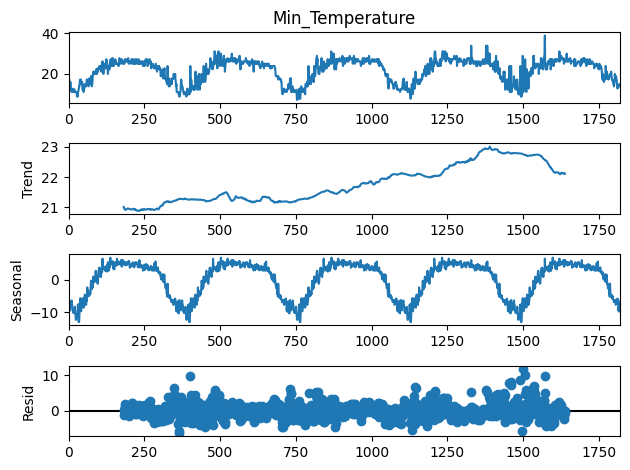

In [8]:
from random import randrange
from pandas import Series



#feature = 'Max_Temperature'
feature = 'Min_Temperature'
series = df[feature]
resulty = seasonal_decompose(series, model='additive', period=365)
resulty.plot()
plt.show()

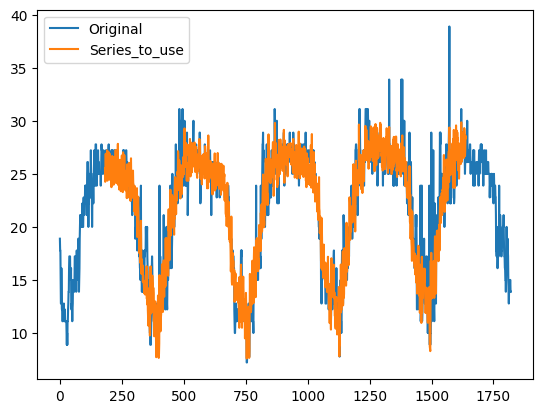

In [9]:
trend = resulty.trend

seasonality = resulty.seasonal
series1 = trend+seasonality

series1.dropna(inplace = True)
y = 1.5
x = -1.5
noise = (y-x)*np.random.rand(len(series1))+x
series1 = series1 + noise
ax = df[feature].plot(label = 'Original')
ax = series1.plot(ax = ax, label = 'Series_to_use')
_ = ax.legend()

In [12]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset


x1 = df[feature].copy()
x1 = series1
x1 = x1.to_numpy()



window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

time = np.arange(len(x1), dtype="float32")
train_percentage = 70
split_time = int(len(x1) * train_percentage / 100)
time_train = time[:split_time]
x_train = x1[:split_time]
time_valid = time[split_time:]
x_valid = x1[split_time:]

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


In [13]:
x_train.shape

(1019,)

In [14]:
l0 = tf.keras.layers.Normalization(input_shape=[window_size])
l1 = tf.keras.layers.Dense(64)
l2 = tf.keras.layers.Dense(128, activation = 'relu')
l3 = tf.keras.layers.Dense(16, activation = 'relu')
l4 = tf.keras.layers.Dense(1)


t_model = tf.keras.models.Sequential([l0, l1, l2, l3, l4])


t_model.compile(loss="mse", 
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5), 
                metrics=[tf.keras.metrics.MeanSquaredError()])

start_time = datetime.datetime.now()

history = t_model.fit(dataset,epochs=1500,verbose=0)

finish_time = datetime.datetime.now()


In [15]:
duration = finish_time-start_time
print('training time is ', duration)

training time is  0:04:29.496857


In [17]:
all_forecast = []

for time in range(len(x1) - window_size):
    all_forecast.append(t_model.predict(x1[time:time + window_size][np.newaxis]))

valid_forecast = all_forecast[split_time-window_size:]
valid_results = np.array(valid_forecast)[:, 0, 0]

train_forecast = all_forecast[window_size:split_time-window_size]
train_results = np.array(train_forecast)[:, 0, 0]

all_results = np.array(all_forecast[window_size:])

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


In [18]:
print(valid_results.shape)
print(x_valid.shape)


(438,)
(438,)


In [19]:
duration = finish_time-start_time
print('Training time is ', duration)

Training time is  0:04:29.496857


In [20]:
#print("Layer weights {}".format(l0.get_weights()))

In [21]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end])
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend(['Real', 'Prediction'])
    plt.grid(True)

In [22]:
print(len(x_train))
print(len(train_results))

1019
959


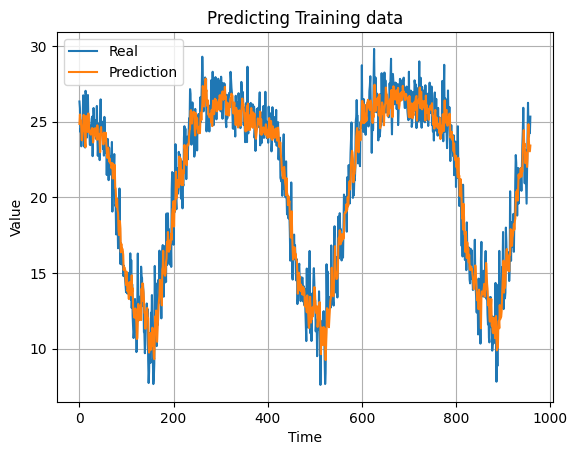

In [23]:
plt.title('Predicting Training data')
time_train = range(len(x_train[60:]))
plot_series(time_train, x_train[60:])
time_train = range(len(train_results))
plot_series(time_train, train_results)

In [24]:
d = {'x':x_train[60:], 'y':train_results}
res = pd.DataFrame(d)
res.to_csv('train.csv')

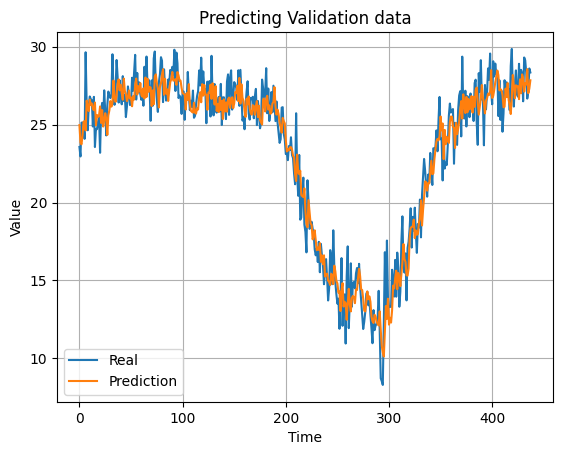

In [25]:
plt.title('Predicting Validation data')
time_valid = range(len(x_valid))
plot_series(time_valid, x_valid)
time_valid = range(len(valid_results))
plot_series(time_valid, valid_results)


In [26]:
print(len(x_valid))
print(len(valid_results))

438
438


In [27]:
d = {'x':x_valid, 'y':valid_results}
res = pd.DataFrame(d)
res.to_csv('test.csv')

In [28]:
train_mse = mean_squared_error(x_train[60:], train_results, squared=False)
print("Train MSE:", train_mse )

test_mse = mean_squared_error(x_valid, valid_results, squared=False)
print("Test MSE:", test_mse )

Train MSE: 1.3979272107750627
Test MSE: 1.4370907997192626


1.947636365890503

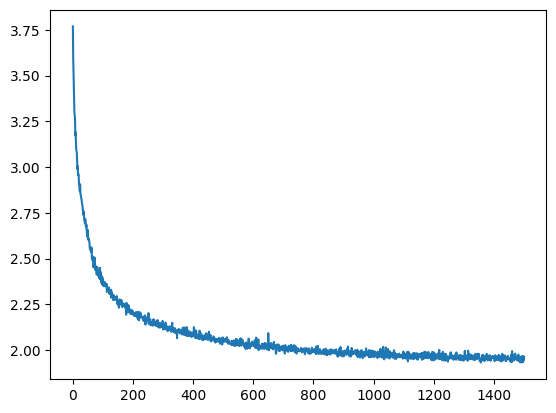

In [29]:
a = history.history['loss']
b = range(1,len(a))
plt.plot(b, a[1:])
a[-1]

In [30]:
testing_values = [ 31.1136, 32.2248, 32.2248, 32.7804, 32.7804, 32.2248, 32.2248, 
                31.1136, 30.0024, 28.8912, 31.1136, 30.0024, 31.1136, 30.0024,
                28.8912, 31.1136, 31.1136, 28.8912, 30.0024, 27.78, 31.1136,
                30.0024, 25.002, 28.8912, 26.1132, 28.8912, 27.78, 30.0024,
                28.8912, 28.8912 ]

In [31]:
prediction = t_model.predict([testing_values])[0][0]

print('The prediction of the ',feature, ' is ', prediction, '*C')

1/1 [==============================] - 0s 42ms/step
The prediction of the  Min_Temperature  is  27.83788 *C


In [32]:
seven = testing_values

for i in range(15):
    pred = t_model.predict([seven])[0][0]
    print(pred)
    seven.append(pred)
    seven = seven[1:]

1/1 [==============================] - 0s 36ms/step
27.83788
1/1 [==============================] - 0s 35ms/step
27.660921
1/1 [==============================] - 0s 35ms/step
27.509806
1/1 [==============================] - 0s 41ms/step
26.75497
1/1 [==============================] - 0s 38ms/step
26.415747
1/1 [==============================] - 0s 59ms/step
26.573872
1/1 [==============================] - 0s 49ms/step
26.527117
1/1 [==============================] - 0s 32ms/step
26.822052
1/1 [==============================] - 0s 47ms/step
26.556276
1/1 [==============================] - 0s 54ms/step
26.548315
1/1 [==============================] - 0s 39ms/step
25.960402
1/1 [==============================] - 0s 38ms/step
25.752907
1/1 [==============================] - 0s 36ms/step
25.490892
1/1 [==============================] - 0s 45ms/step
25.93557
1/1 [==============================] - 0s 35ms/step
25.128012


In [33]:
print('Temperature for next seven day is ',seven[-7:])

Temperature for next seven day is  [26.556276, 26.548315, 25.960402, 25.752907, 25.490892, 25.93557, 25.128012]


In [34]:
#t_model.save('saved_model/max_temp_model')
t_model.save('saved_model/min_temp_model')

INFO:tensorflow:Assets written to: saved_model/min_temp_model\assets
